In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

tx = pd.read_csv('Texas_2.csv')
tx.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,ApprovalDate,...,JobsSupported,NaicsCode,NaicsDescription,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"K STAR GROUP, INC.",310 East Round Grove Road Sui,LEWISVILLE,TX,75067,17,EXEMPT,30000,15000,2/14/18,...,4,424490,Other Grocery and Related Products Merchant Wh...,SBA EXPRES,FA$TRK (Small Loan Express),"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133.0
1,Finite Weld Synergy Inc.,15821 FM 529,HOUSTON,TX,77095,18,EXEMPT,20000,10000,2/13/18,...,6,238390,Other Building Finishing Contractors,SBA EXPRES,FA$TRK (Small Loan Express),"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133.0
2,Ruffneck Engineering & Consult,2500 WOODLAND PARK DR B306,HOUSTON,TX,77077,19,EXEMPT,50000,25000,1/30/18,...,2,541330,Engineering Services,SBA EXPRES,FA$TRK (Small Loan Express),"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133.0
3,"The Solar Brand, Inc",13465 INWOOD RD Apartment 131,Farmers Branch,TX,75244,20,EXEMPT,15000,7500,1/24/18,...,0,423910,Sporting and Recreational Goods and Supplies M...,SBA EXPRES,FA$TRK (Small Loan Express),"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133.0
4,Sam's Auto Salvage Inc,8002 FURAY RD,HOUSTON,TX,77016,21,EXEMPT,10000,5000,1/4/18,...,13,423930,Recyclable Material Merchant Wholesalers,SBA EXPRES,FA$TRK (Small Loan Express),"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133.0


In [3]:
tx =tx.dropna()

In [4]:
X = tx[["LoanStatus", "GrossApproval", "SBAGuarantee"]]
y = tx["COAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1043, 3) (1043, 1)


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["LoanStatus"])
data_binary_encoded.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF
133,350000,315000,1
283,26000,13000,1
291,227100,170325,1
305,466600,349950,1
307,75000,63750,1


In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF
9465,175000,131250,1
11611,75000,37500,1
21047,25000,12500,1
12864,52000,26000,1
13466,50000,25000,1


In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["SBAGuarantee"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["SBAGuarantee"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

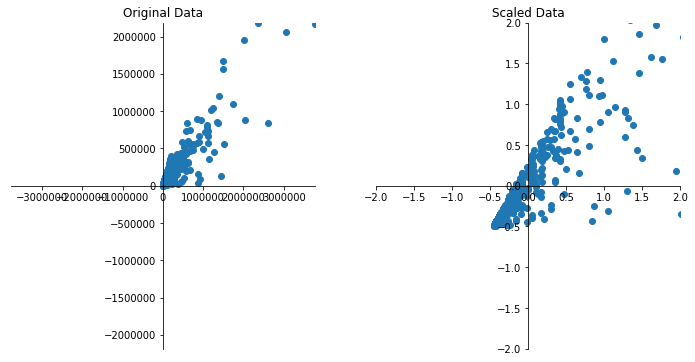

In [10]:
plt.show()

In [11]:
tx.corr()

,BorrZip,BorrID,GrossApproval,SBAGuarantee,ApprovalFiscalYear,InterestRate,TermMonths,COAmount,RevolverStatus,JobsSupported,NaicsCode,BankZip
BorrZip,1.000000,-0.149965,-0.007418,-0.012870,-0.067606,-0.111800,-0.060568,-0.025687,-0.040168,0.002942,-0.073066,0.221614
BorrID,-0.149965,1.000000,-0.142895,-0.137139,0.215393,0.424554,0.042912,-0.143378,0.285932,-0.125462,-0.066994,-0.428726
GrossApproval,-0.007418,-0.142895,1.000000,0.993269,-0.121723,-0.396497,0.398189,0.918041,-0.292862,0.341601,0.028918,0.166027
SBAGuarantee,-0.012870,-0.137139,0.993269,1.000000,-0.134346,-0.388711,0.412451,0.911976,-0.301168,0.335167,0.034792,0.175352
ApprovalFiscalYear,-0.067606,0.215393,-0.121723,-0.134346,1.000000,0.193583,0.047712,-0.099763,0.170279,-0.106280,-0.026898,-0.265505
InterestRate,-0.111800,0.424554,-0.396497,-0.388711,0.193583,1.000000,-0.197835,-0.406217,0.517021,-0.275600,-0.086270,-0.520061
TermMonths,-0.060568,0.042912,0.398189,0.412451,0.047712,-0.197835,1.000000,0.329360,-0.314219,0.043682,0.086907,0.243541
COAmount,-0.025687,-0.143378,0.918041,0.911976,-0.099763,-0.406217,0.329360,1.000000,-0.283866,0.355507,0.020183,0.147423
RevolverStatus,-0.040168,0.285932,-0.292862,-0.301168,0.170279,0.517021,-0.314219,-0.283866,1.000000,-0.155958,-0.141093,-0.609752
JobsSupported,0.002942,-0.125462,0.341601,0.335167,-0.106280,-0.275600,0.043682,0.355507,-0.155958,1.000000,0.049077,0.117997


In [12]:
tx.cov()

,BorrZip,BorrID,GrossApproval,SBAGuarantee,ApprovalFiscalYear,InterestRate,TermMonths,COAmount,RevolverStatus,JobsSupported,NaicsCode,BankZip
BorrZip,2.179058e+06,-1.974616e+06,-4.176088e+06,-5.965195e+06,-187.014710,-249.810071,-3.597564e+03,-8.413057e+06,-29.201466,5.948575e+01,-1.866930e+07,7.561649e+06
BorrID,-1.974616e+06,7.956359e+07,-4.860781e+08,-3.840896e+08,3600.345339,5732.234229,1.540182e+04,-2.837592e+08,1256.054949,-1.533051e+04,-1.034368e+08,-8.839394e+07
GrossApproval,-4.176088e+06,-4.860781e+08,1.454328e+11,1.189356e+11,-86988.120509,-228878.732519,6.110168e+06,7.767871e+10,-55002.579320,1.784586e+06,1.908877e+09,1.463507e+09
SBAGuarantee,-5.965195e+06,-3.840896e+08,1.189356e+11,9.858882e+10,-79048.771876,-184745.992207,5.210973e+06,6.353398e+10,-46570.550374,1.441661e+06,1.890944e+09,1.272651e+09
ApprovalFiscalYear,-1.870147e+02,3.600345e+03,-8.698812e+04,-7.904877e+04,3.511650,0.549108,3.597591e+00,-4.147941e+04,0.157147,-2.728319e+00,-8.724695e+03,-1.150042e+04
InterestRate,-2.498101e+02,5.732234e+03,-2.288787e+05,-1.847460e+05,0.549108,2.291229,-1.204951e+01,-1.364272e+05,0.385417,-5.714805e+00,-2.260357e+04,-1.819592e+04
TermMonths,-3.597564e+03,1.540182e+04,6.110168e+06,5.210973e+06,3.597591,-12.049513,1.619072e+03,2.940445e+06,-6.226635,2.407788e+01,6.052961e+05,2.265117e+05
COAmount,-8.413057e+06,-2.837592e+08,7.767871e+10,6.353398e+10,-41479.409013,-136427.215942,2.940445e+06,4.922863e+10,-31017.744254,1.080548e+06,7.751148e+08,7.560664e+08
RevolverStatus,-2.920147e+01,1.256055e+03,-5.500258e+04,-4.657055e+04,0.157147,0.385417,-6.226635e+00,-3.101774e+04,0.242536,-1.052163e+00,-1.202748e+04,-6.941082e+03
JobsSupported,5.948575e+01,-1.533051e+04,1.784586e+06,1.441661e+06,-2.728319,-5.714805,2.407788e+01,1.080548e+06,-1.052163,1.876614e+02,1.163716e+05,3.736316e+04


In [27]:
tx.describe()

,BorrZip,BorrID,GrossApproval,SBAGuarantee,ApprovalFiscalYear,InterestRate,TermMonths,COAmount,RevolverStatus,JobsSupported,NaicsCode,BankZip
count,1043.000000,1043.000000,1.043000e+03,1.043000e+03,1043.000000,1043.000000,1043.000000,1.043000e+03,1043.000000,1043.000000,1043.00000,1043.000000
mean,76994.306807,18040.292426,1.778458e+05,1.360501e+05,2012.144775,7.289676,61.511985,1.136695e+05,0.412272,9.668265,520545.56280,58239.296261
std,1476.163357,8919.842756,3.813566e+05,3.139886e+05,1.873940,1.513681,40.237689,2.218752e+05,0.492480,13.698958,173093.49072,23114.543715
min,75001.000000,169.000000,5.000000e+03,2.500000e+03,2010.000000,2.250000,0.000000,1.826000e+03,0.000000,0.000000,115112.00000,918.000000
25%,75247.500000,12123.000000,2.500000e+04,1.250000e+04,2010.000000,6.000000,40.000000,1.848800e+04,0.000000,3.000000,425050.00000,35233.000000
50%,77073.000000,19058.000000,5.000000e+04,2.500000e+04,2012.000000,7.250000,58.000000,3.883800e+04,0.000000,5.000000,517210.00000,43240.000000
75%,78219.000000,26049.000000,1.500000e+05,1.275000e+05,2014.000000,8.530000,72.000000,1.161020e+05,1.000000,12.000000,624300.00000,78702.000000
max,79938.000000,31523.000000,4.195000e+06,3.775500e+06,2017.000000,10.000000,286.000000,2.185789e+06,1.000000,150.000000,922160.00000,99503.000000


In [16]:
X = pd.get_dummies(tx[["GrossApproval", "SBAGuarantee", "LoanStatus"]])
y = tx["COAmount"].values.reshape(-1, 1)
X.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF
133,350000,315000,1
283,26000,13000,1
291,227100,170325,1
305,466600,349950,1
307,75000,63750,1


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

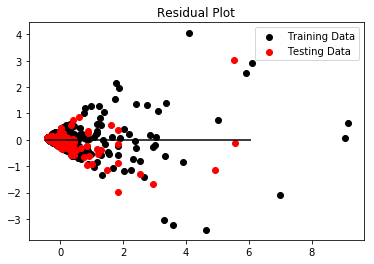

In [20]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="black", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11526055900528956, R2: 0.8526407927800603


In [26]:
from scipy.stats import ttest_ind_from_stats

#When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results.
#The p-value is a number between 0 and 1 and interpreted in the following way: A small p-value (typically ≤ 0.05) 
#indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

In [28]:
n1 = 1043

mean1 = 1.778458e+05

std1 = 3.813566e+05

n2 = 1043

mean2 = 1.360501e+05

std2 = 3.139886e+05

tstat, pvalue = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

pvalue

0.006338701012257553